# Train Toxicity Model

This notebook trains a model to detect toxicity in online comments. It uses a CNN architecture for text classification trained on the [Wikipedia Talk Labels: Toxicity dataset](https://figshare.com/articles/Wikipedia_Talk_Labels_Toxicity/4563973) and pre-trained GloVe embeddings which can be found at:
http://nlp.stanford.edu/data/glove.6B.zip
(source page: http://nlp.stanford.edu/projects/glove/).

This model is a modification of [example code](https://github.com/fchollet/keras/blob/master/examples/pretrained_word_embeddings.py) found in the [Keras Github repository](https://github.com/fchollet/keras) and released under an [MIT license](https://github.com/fchollet/keras/blob/master/LICENSE). For further details of this license, find it [online](https://github.com/fchollet/keras/blob/master/LICENSE) or in this repository in the file KERAS_LICENSE. 

## Usage Instructions
(TODO: nthain) - Move to README

Prior to running the notebook, you must:

* Download the [Wikipedia Talk Labels: Toxicity dataset](https://figshare.com/articles/Wikipedia_Talk_Labels_Toxicity/4563973)
* Download pre-trained [GloVe embeddings](http://nlp.stanford.edu/data/glove.6B.zip)
* (optional) To skip the training step, you will need to download a model and tokenizer file. We are looking into the appropriate means for distributing these (sometimes large) files.

In [11]:
from model_tool import ToxModel

## Load Data

In [10]:
SPLITS = ['train', 'dev', 'test']

wiki = {}
debias = {}
random = {}
for split in SPLITS:
    wiki[split] = '../data/wiki_%s.csv' % split
    debias[split] = '../data/wiki_debias_%s.csv' % split
    random[split] = '../data/wiki_debias_random_%s.csv' % split

## Train Models

### Wikipedia Model

In [4]:
%%time
MODEL_NAME = 'cnn_wiki_tox_v3'
wiki_model = ToxModel()
wiki_model.train(wiki['train'], wiki['dev'], text_column = 'comment', label_column = 'is_toxic', model_name = MODEL_NAME)

Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/3
95692/95692 [==============================] - 596s - loss: 0.1471 - acc: 0.9477 - val_loss: 0.1052 - val_acc: 0.9615
Epoch 2/3
95692/95692 [==============================] - 673s - loss: 0.1017 - acc: 0.9637 - val_loss: 0.0991 - val_acc: 0.9635
Epoch 3/3
95692/95692 [==============================] - 665s - loss: 0.0904 - acc: 0.9673 - val_loss: 0.1160 - val_acc: 0.9640
Model trained!
Saving model...
Model saved!
CPU times: user 4h 51min 12s, sys: 18min, total: 5h 9min 12s
Wall time: 32min 39s


In [13]:
from keras.preprocessing.sequence import pad_sequences

def hack_score(model, texts):
    sequences = model.tokenizer.texts_to_sequences(texts)
    data = pad_sequences(sequences, maxlen=1000)
    return model.predict(data)

In [24]:
%%time

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import datetime


wiki['name'] = 'orig'
debias['name'] = 'debias'
random['name'] = 'random'

test_results = {}
spooky_models = []

for i in xrange(6):
    for m in [wiki, debias, random]:
        name = 'spooky_{}_v{}'.format(m['name'], i)
        print('training', name, datetime.datetime.now())
        model = ToxModel()
        model.train(m['train'], m['dev'], text_column='comment', label_column='is_toxic', model_name=name)
        spooky_models.append((name, model))

training spooky_orig_v0 2017-10-04 00:21:56.333810
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/3
95692/95692 [==============================] - 585s - loss: 0.1460 - acc: 0.9479 - val_loss: 0.1030 - val_acc: 0.9617
Epoch 2/3
95692/95692 [==============================] - 585s - loss: 0.1003 - acc: 0.9640 - val_loss: 0.1362 - val_acc: 0.9546
Epoch 3/3
95692/95692 [==============================] - 585s - loss: 0.0914 - acc: 0.9678 - val_loss: 0.1176 - val_acc: 0.9645
Model trained!
Saving model...
Model saved!
training spooky_debias_v0 2017-10-04 00:51:37.893455
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/3
99157/99157 [==============================] - 607s - loss: 0.1450 - acc: 0.9489 - val_loss: 0.1290 - val_acc: 0.9571
Epoch 2/

KeyboardInterrupt: 

In [26]:
spooky_models_last = spooky_models[-1]

In [28]:
spooky_models_last

('spooky_orig_v5', <model_tool.ToxModel instance at 0x7fb1a46cc758>)

In [29]:
spooky_models2 = spooky_models[:-1]
spooky_models2

[('spooky_orig_v0', <model_tool.ToxModel instance at 0x7fb4f6ef2e18>),
 ('spooky_debias_v0', <model_tool.ToxModel instance at 0x7fb4cf07c878>),
 ('spooky_random_v0', <model_tool.ToxModel instance at 0x7fb4b93243f8>),
 ('spooky_orig_v1', <model_tool.ToxModel instance at 0x7fb4cbb9fdd0>),
 ('spooky_debias_v1', <model_tool.ToxModel instance at 0x7fb310bbf368>),
 ('spooky_random_v1', <model_tool.ToxModel instance at 0x7fb2e8f48e60>),
 ('spooky_orig_v2', <model_tool.ToxModel instance at 0x7fb2e32b1128>),
 ('spooky_debias_v2', <model_tool.ToxModel instance at 0x7fb2b4d6b3f8>),
 ('spooky_random_v2', <model_tool.ToxModel instance at 0x7fb27cb1e560>),
 ('spooky_orig_v3', <model_tool.ToxModel instance at 0x7fb2648eb560>),
 ('spooky_debias_v3', <model_tool.ToxModel instance at 0x7fb23cd54290>),
 ('spooky_random_v3', <model_tool.ToxModel instance at 0x7fb22496bc20>),
 ('spooky_orig_v4', <model_tool.ToxModel instance at 0x7fb216ce3290>),
 ('spooky_debias_v4', <model_tool.ToxModel instance at 0x7fb1

In [36]:
hack_score(spooky_models2[0][1],wiki['test']['comment'])

TypeError: string indices must be integers, not str

In [37]:
wiki['test']

'../data/wiki_test.csv'

In [39]:
%%time

import pandas as pd

test_sets = [pd.read_csv(path) for path in [wiki['test'], debias['test'], random['test']]]

for i, test_set in enumerate(test_sets):
    for (name, model) in spooky_models2:
        print('scoring', i, name, datetime.datetime.now())
        test_results[name] = hack_score(model, test_set['comment'])

scoring 0 spooky_orig_v0 2017-10-04 11:12:12.684036
scoring 0 spooky_debias_v0 2017-10-04 11:13:42.611486
scoring 0 spooky_random_v0 2017-10-04 11:15:38.811669
scoring 0 spooky_orig_v1 2017-10-04 11:17:07.660048
scoring 0 spooky_debias_v1 2017-10-04 11:18:52.076721
scoring 0 spooky_random_v1 2017-10-04 11:20:48.096026
scoring 0 spooky_orig_v2 2017-10-04 11:22:19.801965
scoring 0 spooky_debias_v2 2017-10-04 11:23:49.042078
scoring 0 spooky_random_v2 2017-10-04 11:27:02.968241
scoring 0 spooky_orig_v3 2017-10-04 11:28:33.812361
scoring 0 spooky_debias_v3 2017-10-04 11:30:04.218309
scoring 0 spooky_random_v3 2017-10-04 11:32:04.785935
scoring 0 spooky_orig_v4 2017-10-04 11:33:34.530306
scoring 0 spooky_debias_v4 2017-10-04 11:35:04.777843
scoring 0 spooky_random_v4 2017-10-04 11:38:03.601047
scoring 1 spooky_orig_v0 2017-10-04 11:42:31.448177


KeyboardInterrupt: 

In [41]:
orig_results = [test_results['spooky_orig_v0'], test_results['spooky_orig_v1'], test_results['spooky_orig_v2'],
                test_results['spooky_orig_v3'], test_results['spooky_orig_v4']] 
debias_results = [test_results['spooky_debias_v0'], test_results['spooky_debias_v1'], test_results['spooky_debias_v2'],
                  test_results['spooky_debias_v3'], test_results['spooky_debias_v4']] 
random_results = [test_results['spooky_random_v0'], test_results['spooky_random_v1'], test_results['spooky_random_v2'],
                  test_results['spooky_random_v3'], test_results['spooky_random_v4']] 

In [44]:
import matplotlib.pyplot as plt

orig scores


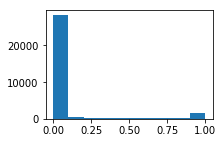

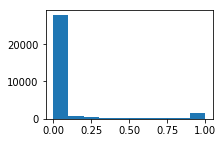

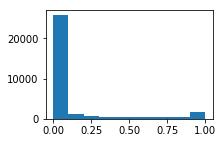

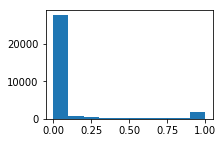

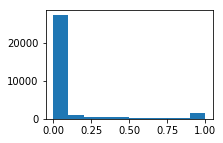

debias scores


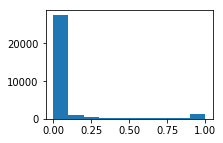

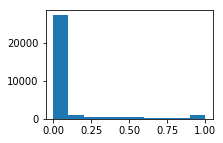

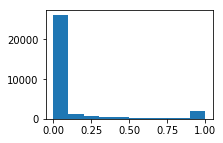

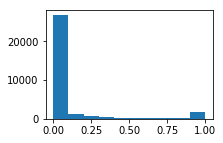

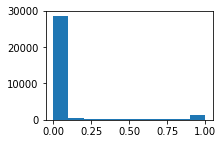

random scores


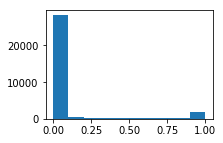

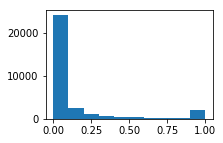

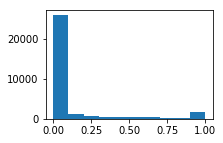

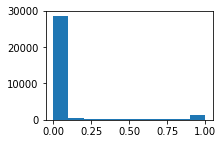

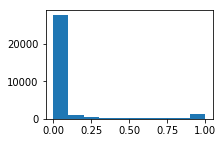

In [63]:
opts = {'log': False, 'normed': False}

print('orig scores')
for scores in orig_results:
    plt.figure(figsize=(3,2))
    plt.hist(scores, **opts)
    plt.show()
    
print('debias scores')
for scores in debias_results:
    plt.figure(figsize=(3,2))
    plt.hist(scores, **opts)
    plt.show()
    
print('random scores')
for scores in random_results:
    plt.figure(figsize=(3,2))
    plt.hist(scores, **opts)
    plt.show()

In [58]:
map(len, orig_results)

[31866, 31866, 31866, 31866, 31866]

In [73]:
[model_tool.compute_auc(test_sets[0]['is_toxic'], scores) for scores in orig_results]

[0.96897995365611589,
 0.97703257241710084,
 0.96907637628603738,
 0.97677017808751421,
 0.97493965659039661]

In [74]:
[model_tool.compute_auc(test_sets[0]['is_toxic'], scores) for scores in debias_results]

[0.96566880771696162,
 0.97167217662881655,
 0.97509745977515871,
 0.97394611471504855,
 0.96275374082690013]

In [75]:
[model_tool.compute_auc(test_sets[0]['is_toxic'], scores) for scores in random_results]

[0.96533774663108818,
 0.9758727856095335,
 0.97477515920805546,
 0.97448330699371499,
 0.97095007421906943]

In [82]:
wiki_test_set = test_sets[0]

In [90]:
for i, orig_scores in enumerate(orig_results):
    wiki_test_set['orig' + str(i)] = orig_scores

In [96]:
%matplotlib inline

In [105]:
wiki_test_set['orig_var'] = wiki_test_set[['orig0', 'orig1', 'orig2', 'orig3', 'orig4']].var(axis=1)

In [106]:
wiki_test_set.head()

,rev_id,toxicity,comment,year,logged_in,ns,sample,split,is_toxic,orig0,orig1,orig2,orig3,orig4,orig_var
0,8953.0,0.0,Elected or Electoral? JHK,2002,False,article,random,test,False,7.043147e-03,1.317962e-03,1.079342e-01,0.006836,0.003723,2.135827e-03
1,28959.0,0.2,Please relate the ozone hole to increases in c...,2002,True,article,random,test,False,1.140104e-06,3.714644e-04,3.891382e-02,0.000442,0.000880,2.963967e-04
2,138074.0,0.0,` I'm not sure if it's properly called ``fi...,2002,True,article,random,test,False,1.101016e-04,1.626936e-03,1.339490e-02,0.005810,0.001825,2.887587e-05
3,200664.0,0.0,Thanks on the info on how to move a page....,2002,True,user,random,test,False,1.260073e-09,2.369752e-08,6.237125e-10,0.000060,0.000013,6.645600e-10
4,213105.0,0.0,"` : I should do that too, I agree, but I've a...",2002,True,user,random,test,False,3.549992e-04,5.193395e-04,5.571159e-03,0.002910,0.001908,4.542143e-06


In [134]:
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_colwidth', 135)

In [135]:
wiki_test_set.sort_values('orig_var', ascending=False)[['comment', 'is_toxic', 'orig0', 'orig1', 'orig2', 'orig3', 'orig4']]

,comment,is_toxic,orig0,orig1,orig2,orig3,orig4
15279,==supertall fag== fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag...,True,1.000,1.000,0.000,1.000,0.000
15351,:I tried googling http://www.google.com/search?hl=nt&lr;=&q;=%22%D1%82%D0%B5%D0%BE%D0%B4%D0%BE%D1%80+%D0%94%D0%BE%D1%81%D1%82%D0%B...,False,0.000,1.000,0.000,1.000,0.000
11334,*** After all the times you have thwarted me... After all the times my plans for world domination were foiled by your meddlesome ...,True,0.000,1.000,0.000,1.000,0.000
18786,== I despise the way you have treated my fellow Christian friend. == male • gay • married • a socialist • a vegetarian • We...,True,0.000,1.000,0.001,1.000,0.003
3696,"June 2006 (UTC) : Faggot 01:07, 19",True,0.000,1.000,0.000,1.000,0.006
27447,"`, 21 June 2013 (UTC) :::Okay ima gey, god hate me brah 22:26`",True,0.000,0.987,0.001,0.992,0.000
3658,:Nazism and religion Nazi mysticism Nazi architecture Category:Nazi physicians Nazi human experimentation Nazism and race Nazi so...,True,0.003,0.055,0.000,0.853,0.985
15197,Bollocks all is bollocks Bollocks all is bollocks Bollocks all is bollocks Bollocks all is bollocks Bollocks all is bollocks Bolloc...,True,0.046,0.967,0.300,1.000,0.999
16996,"{{Infobox Anatomy | Name = Human penis | Latin = penis, penes | GraySubject = 262 | GrayPage = 1247 ...",False,0.000,0.542,0.000,1.000,0.000
4117,PENIS SMACKING WILLY WANKING WILLY WONG,True,1.000,1.000,0.049,1.000,0.970


In [142]:
wiki_test_set.loc[18791].comment

"     U FAT NOOB!!  I'm Samuel Gary Carter and I can't offend myself!!  I didn't add either of those pages  soo something must have hacked into mya ccount  and done i tthere"

In [87]:
model_tool.compute_auc(wiki_test_set['is_toxic'], wiki_test_set['blahtest'])

0.96897995365611589

In [67]:
import model_tool
model_tool.compute_auc()

In [10]:
%%time
MODEL_NAME = 'cnn_debias_tox_v3'
debias_model = ToxModel()
debias_model.train(debias['train'], debias['dev'], text_column = 'comment', label_column = 'is_toxic', model_name = MODEL_NAME)

Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/3
99157/99157 [==============================] - 689s - loss: 0.1433 - acc: 0.9489 - val_loss: 0.1220 - val_acc: 0.9584
Epoch 2/3
99157/99157 [==============================] - 698s - loss: 0.0991 - acc: 0.9641 - val_loss: 0.0988 - val_acc: 0.9650
Epoch 3/3
99157/99157 [==============================] - 698s - loss: 0.0880 - acc: 0.9678 - val_loss: 0.1419 - val_acc: 0.9504
Model trained!
Saving model...
Model saved!
CPU times: user 4h 59min 1s, sys: 17min 33s, total: 5h 16min 34s
Wall time: 35min 10s


In [11]:
debias_model.prep_data_and_score(debias['test'], text_column = 'comment', label_column = 'is_toxic')

0.97595644478981225

In [8]:
#TODOOOOOOOOOOOOOOOOOOOOOO
MODEL_NAME = 'cnn_debias_random_tox_v3'
debias_random_model = ToxModel()
debias_random_model.train(random['train'], random['dev'], text_column = 'comment', label_column = 'is_toxic', model_name = MODEL_NAME)

Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/3
99157/99157 [==============================] - 657s - loss: 0.1453 - acc: 0.9485 - val_loss: 0.1178 - val_acc: 0.9588
Epoch 2/3
99157/99157 [==============================] - 695s - loss: 0.0997 - acc: 0.9646 - val_loss: 0.1042 - val_acc: 0.9655
Epoch 3/3
99157/99157 [==============================] - 695s - loss: 0.0898 - acc: 0.9680 - val_loss: 0.0953 - val_acc: 0.9657
Model trained!
Saving model...
Model saved!


In [9]:
debias_random_model.prep_data_and_score(random['test'], text_column = 'comment', label_column = 'is_toxic')

0.97641284855407495